In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
genes = ['gene' + str(i) for i in range(1,101)]

In [3]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range (1,6)]

In [4]:
data = pd.DataFrame(columns =[*wt, *ko], index=genes)

In [5]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [6]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  209  231  261  255  227  800  812  824  811  810
gene2  870  866  885  890  921  571  567  524  513  556
gene3  583  528  566  627  604  567  561  529  525  575
gene4  549  582  580  549  540  754  741  772  729  767
gene5  447  457  454  463  489  692  697  648  652  667


In [14]:
print(data.shape)

(100, 10)


In [15]:
#Center and scale the data (T stands for transposing)
scaled_data = preprocessing.scale(data.T)

In [18]:
#create PCA object
pca = PCA()
#PCA math - calculate loading scores and variation for each principal component
pca.fit(scaled_data)
#generate coordinates for a PCA graph based on loading scores and scaled data
pca_data = pca.transform(scaled_data)

In [20]:
#calculate the percentage of variation each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

#create labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

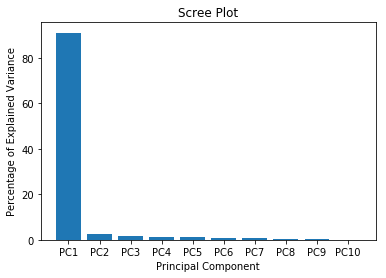

In [21]:
#create bar plot
plt.bar(x=range(1,len(per_var)+1), height = per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Almost all of the variation is along the first PC, meaning a 2D graph using PC1 and PC2 should do a good job representing the original data

In [23]:
#draw a PCA plot
#put new coordinates created by pca.transform(scaled.data)
#into a matrix where rows have sample labels and the columns have PC labels
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

<function matplotlib.pyplot.show(*args, **kw)>

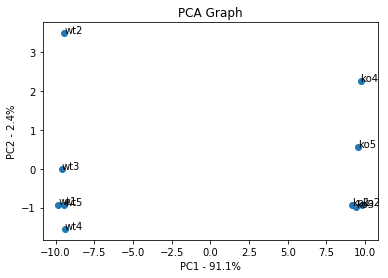

In [29]:
#scatter plot
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#This loop adds sample names to graph 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show

The 'wt' samples clustered on the left side, suggesting that they are correlated with each other. The 'ko' sample clustered on the right side, suggesting that they are correlated with each other. The separation of the two clusters among the x axis suggest that 'wt' samples are very different from 'ko' samples.

In [35]:
#examining the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
#sorting the loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#names of top 10 indexes(genes)
top_10_genes = sorted_loading_scores[0:10].index.values
#print top 10 gene names and their loading scores
print(loading_scores[top_10_genes])

gene13    0.104680
gene22    0.104672
gene48   -0.104671
gene71   -0.104668
gene60    0.104659
gene73    0.104656
gene1     0.104638
gene19   -0.104636
gene37   -0.104633
gene93    0.104624
dtype: float64


These values are very similar, so a lot of genes played a role in separating the sample, rather than just one or two. 